## Load libraries and data

In [1]:
import pandas as pd
from fastai.text import *

In [3]:
path = '../input/'
song_dat = pd.read_csv(path+'songdata.csv').drop(['link', 'song'], axis=1)
song_dat.head()

,artist,text
0,ABBA,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,I'll never know why I had to go \nWhy I had t...
3,ABBA,Making somebody happy is a question of give an...
4,ABBA,Making somebody happy is a question of give an...


### Filter-out Artists that i know of more or less

In [4]:
artist_list = [
    'Avril Lavigne',
    'Bob Marley',
    'Bon Jovi',
    'Bruno Mars',
    'Coldplay',
    'Ed Sheeran',
    'Enrique Iglesias',
    'Fall Out Boy',
    'Foo Fighters',
    'Green Day'
    ]

In [5]:
song_dat = song_dat.loc[song_dat.artist.isin(artist_list), :].reset_index(drop=True)
song_dat = song_dat.sample(frac=0.3, replace=False, random_state=12).reset_index(drop=True)
song_dat.head()

,artist,text
0,Coldplay,Where is my boy? \nI saw you come out of a sc...
1,Bon Jovi,"You want commitment, and take a look into thes..."
2,Bruno Mars,Oh I never done this before \nNever wanna do ...
3,Foo Fighters,All the things I said I wanted turned out to b...
4,Enrique Iglesias,"So Turn Up the Night \nI know you want it, oh..."


In [6]:
song_dat.shape

(344, 2)

In [7]:
bs = 48

### Prep data for modellling

In [8]:
data_lm = (TextList.from_df(path='.', df=song_dat, cols=1)
            .random_split_by_pct(0.1)
            .label_for_lm()           
            .databunch(bs=bs))
data_lm.save('/tmp/'+'data_lm.pkl')

In [9]:
data_lm = load_data('/tmp/', fname='data_lm.pkl', bs=bs)

data_lm.show_batch()

idx,text
0,"eyes to my world \n i see you come out of it all \n xxmaj xxunk and xxunk \n xxmaj and xxunk , oh \n \n xxmaj come on in \n xxmaj in xxunk i live in \n xxmaj and changes you 're making \n xxmaj to the state of xxunk \n \n xxmaj calling "" where is my boy ? """
1,"out of key \n \n xxmaj sister of mine , home again \n xxmaj sister of mine , home again \n \n xxmaj broken on a ship of fools \n xxmaj even dreams must fall to xxunk \n xxmaj so xxunk \n \n xxmaj words are all just xxunk sound \n xxmaj just like xxunk they fall around \n xxmaj and we"
2,"show me , you got to you got to show me \n xxmaj you tell me all day that you 're lonely \n xxmaj but show me show me show me tonight , yeah \n \n xxmaj love the way that you laugh , the way that you smile \n xxmaj makes me feel like you 've been waiting a while xxmaj but guess what ?"
3,turn the outside in to the inside \n xxmaj xxunk your outside in for the inside \n xxmaj turn it around again \n \n i 'm amounted \n \n xxmaj and i ca n't change back for you \n xxmaj no i ca n't change back for you \n \n xxbos xxmaj oh i was perfect \n xxmaj for the circus \n
4,xxmaj night \n \n xxmaj where xxmaj did xxmaj she go \n xxmaj where xxmaj did xxmaj she go \n xxmaj where 'd xxmaj she go \n i 've xxmaj been xxmaj looking xxmaj for xxmaj her xxmaj all xxmaj night \n \n xxmaj where xxmaj did xxmaj she go \n xxmaj where xxmaj did xxmaj she go \n xxmaj where 'd xxmaj


## Modelling

In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.3, model_dir="/tmp/model/")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03


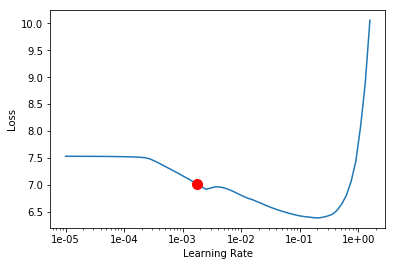

In [11]:
learn.lr_find()
learn.recorder.plot(skip_start=25)

In [12]:
learn.fit_one_cycle(4, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.819149,5.132161,0.103175
2,5.487025,5.138243,0.103175
3,5.355872,5.056710,0.103175
4,5.280820,5.049484,0.103175


In [13]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.197729,5.048249,0.103175
2,5.196630,5.050473,0.103175


### Music generation

In [14]:
def gen_lyric(primer, n_words, n_sen, temp):
    print("\n".join(learn.predict(primer, n_words, temperature=temp) for _ in range(n_sen)))

In [17]:
gen_lyric('I wanna go home', 40, 1, 0.8)

I wanna go home To 's 
 
  and you in On I . Way left when i I 
  let enough 'm me I up a me 
  One if world i 
  
  , the


In [19]:
gen_lyric('Loving can hurt', 40, 3, 0.9)

Loving can hurt chorus 
  for from he , about the you is never I you far the was you 
 
  
  ' 
 
  had 
  do 
  kid my that you me me I friends With that
Loving can hurt no wish take , 
  Baby from 
 
  
  you Oh something i you you 
  promises 're gon go never your i on 
  . Of 
  To , my in
Loving can hurt you you in Who 'm i better 
  this 'll me i but , Downpressors cheap Have n't i this , comes dying 
  ' there 
  By you i around run Got 
  in
